# Load the dataset

In [1]:
import pandas as pd

In [2]:
# Step 1: Load the dataset
iris_df = pd.read_csv('iris.csv')

# Exploratory Data Analysis

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
# View the first few rows of the dataset
print("First few rows of the dataset:")
print(iris_df.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Display summary statistics
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
# Check for missing values
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Data Visualisation

In [6]:
import matplotlib.pyplot as plt

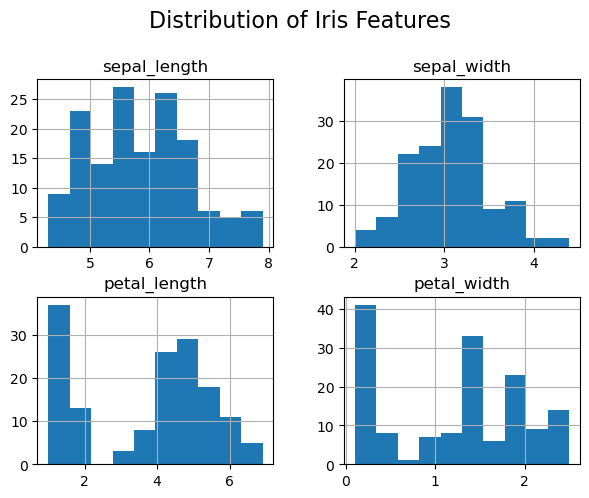

In [7]:
# Visualize the distribution of each feature
iris_df.hist(figsize=(7, 5))
plt.suptitle('Distribution of Iris Features', x=0.5, y=1.02, fontsize=16)
plt.show()

In [8]:
import seaborn as sns

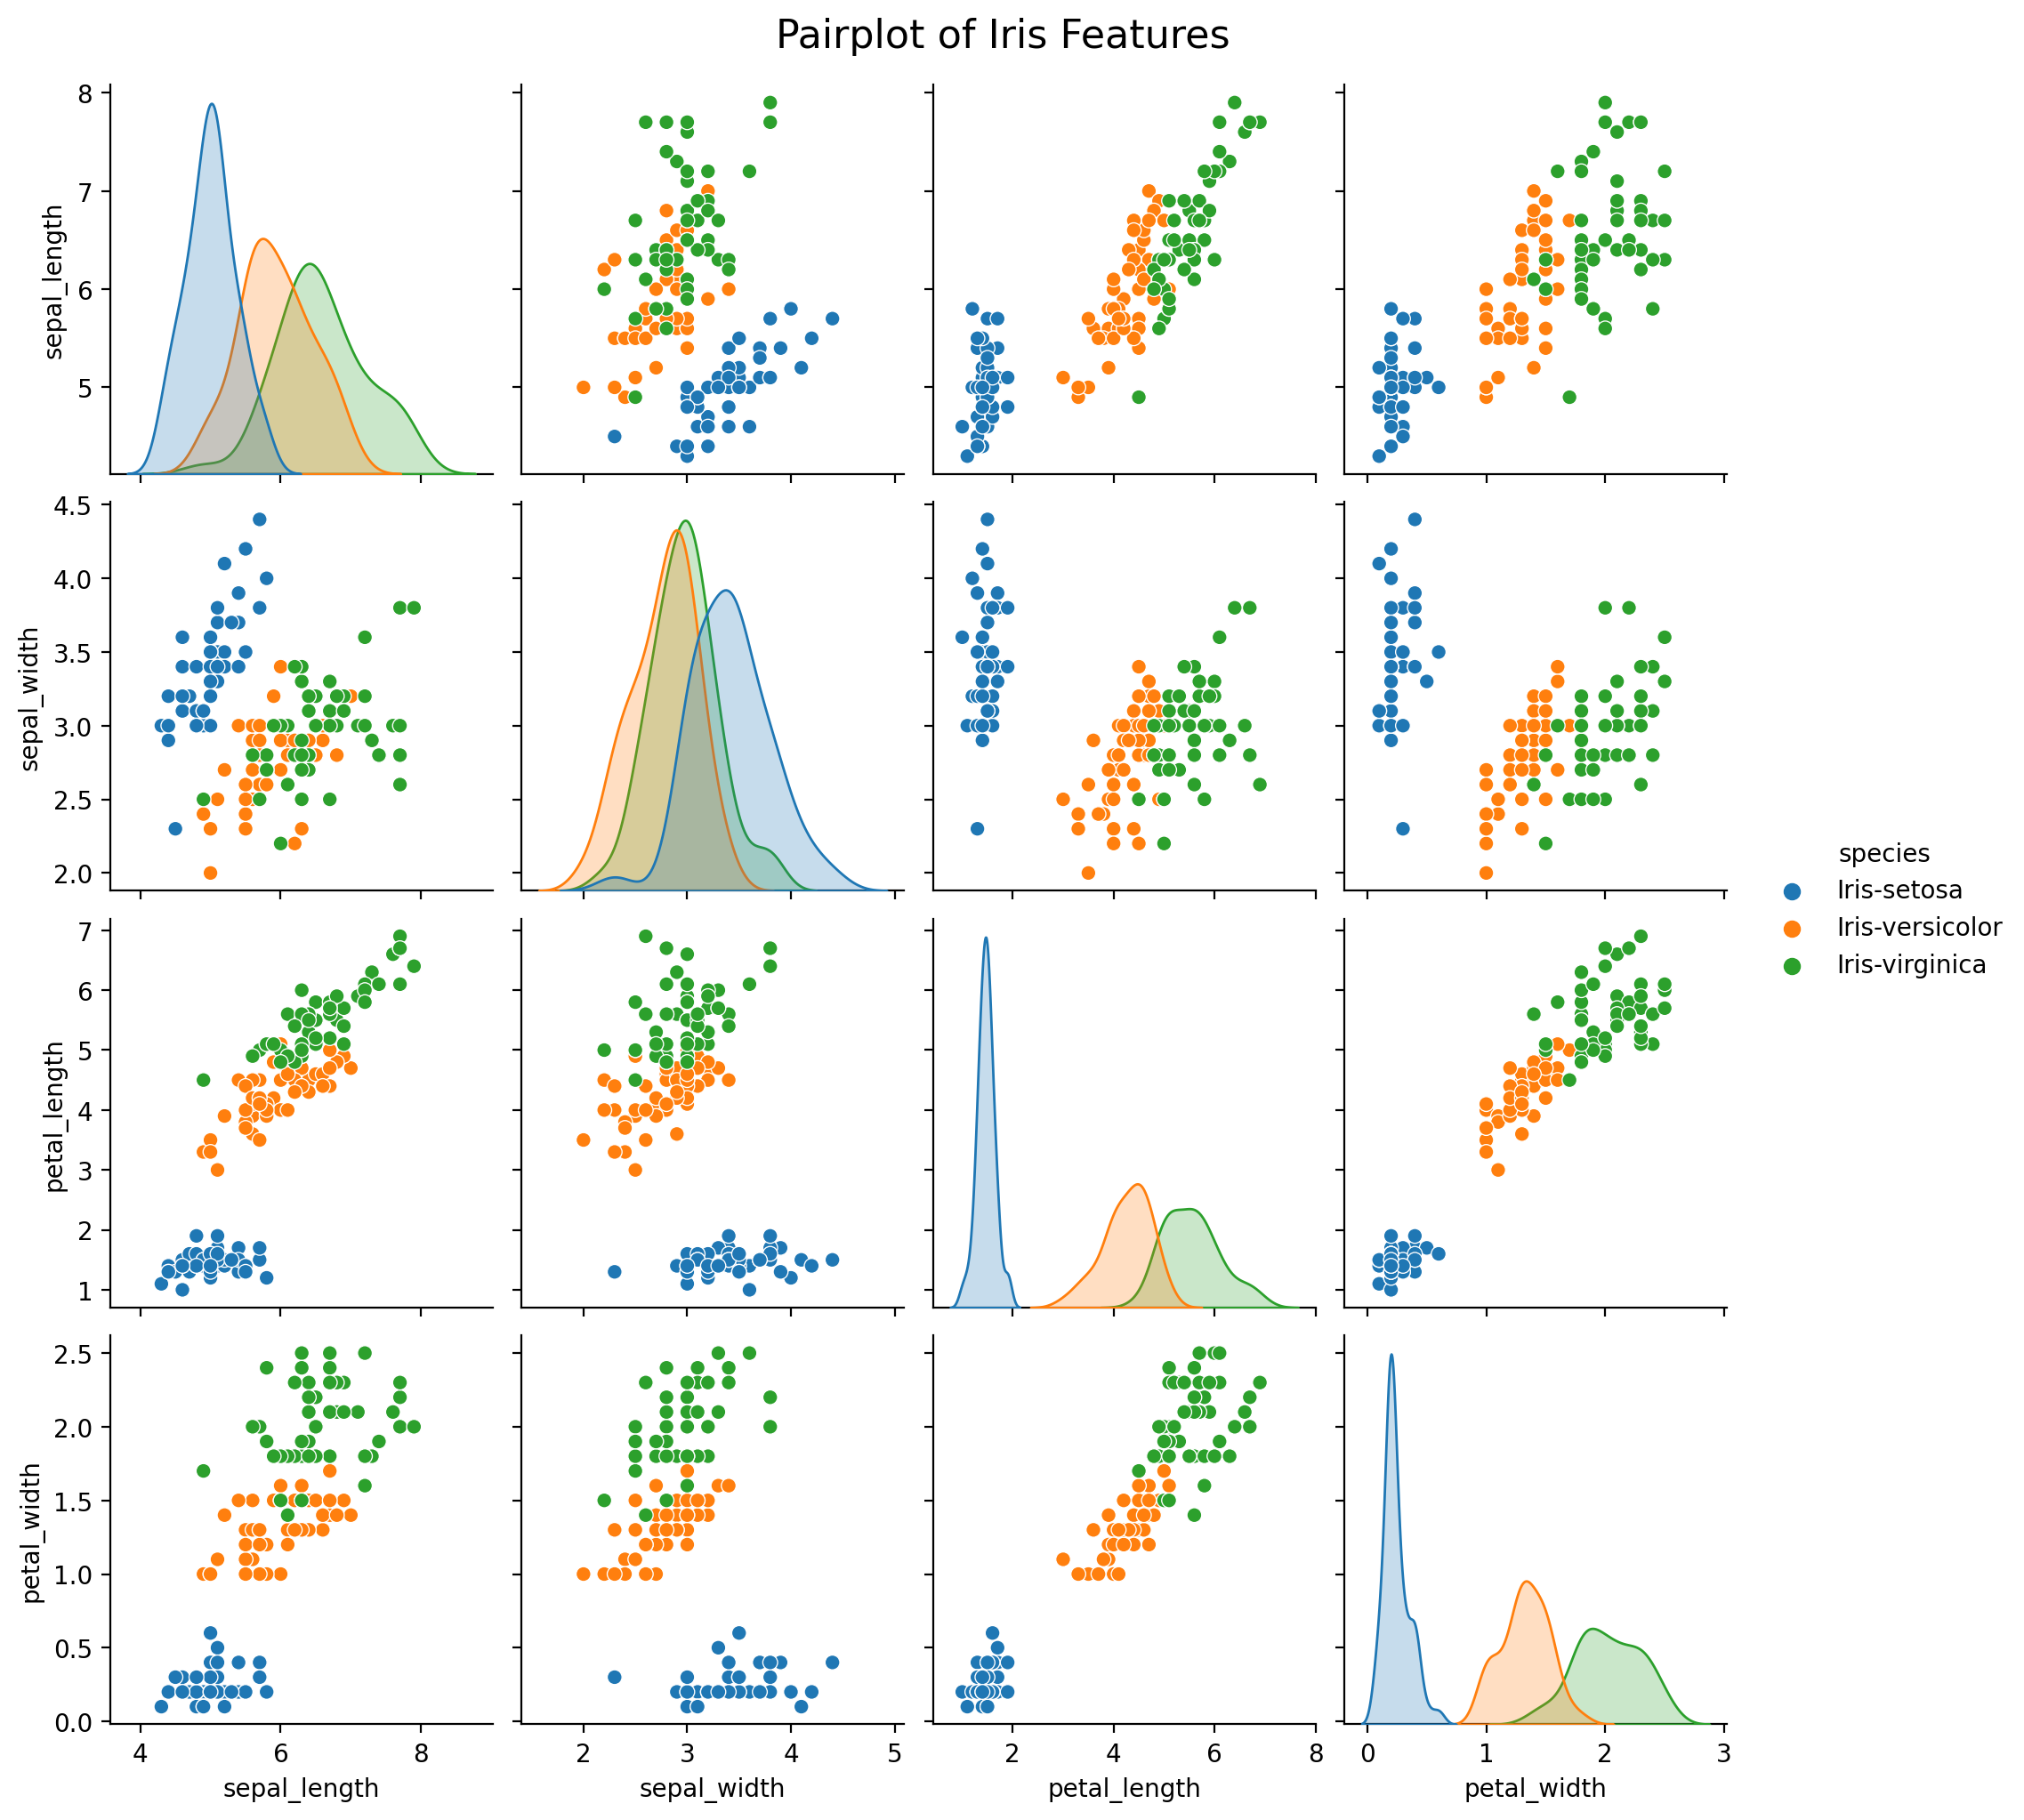

In [22]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot of Iris Features', x=0.5, y=1.02, fontsize=16)
plt.show()

In [21]:
# Hiding future warnings for matplotlib in jupyter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Model Preprocessing and Training

In [12]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
X = iris_df.drop('species', axis=1)
print(X)
y = iris_df['species']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

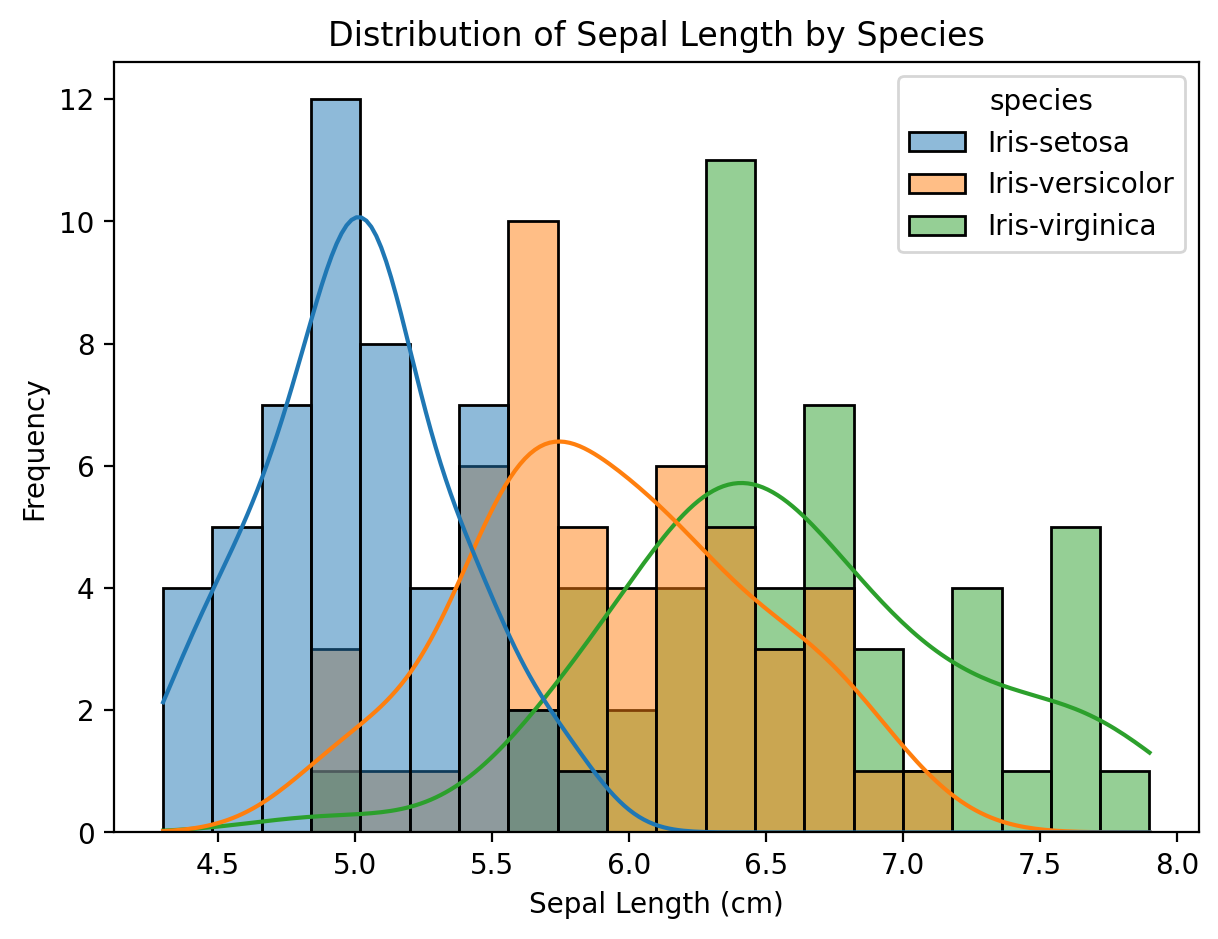

In [11]:
# Visualize the distribution of each feature
plt.figure(figsize=(7, 5))
sns.histplot(data=iris_df, x="sepal_length", kde=True, bins=20, hue='species')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Model Training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Model Evaluation

In [16]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


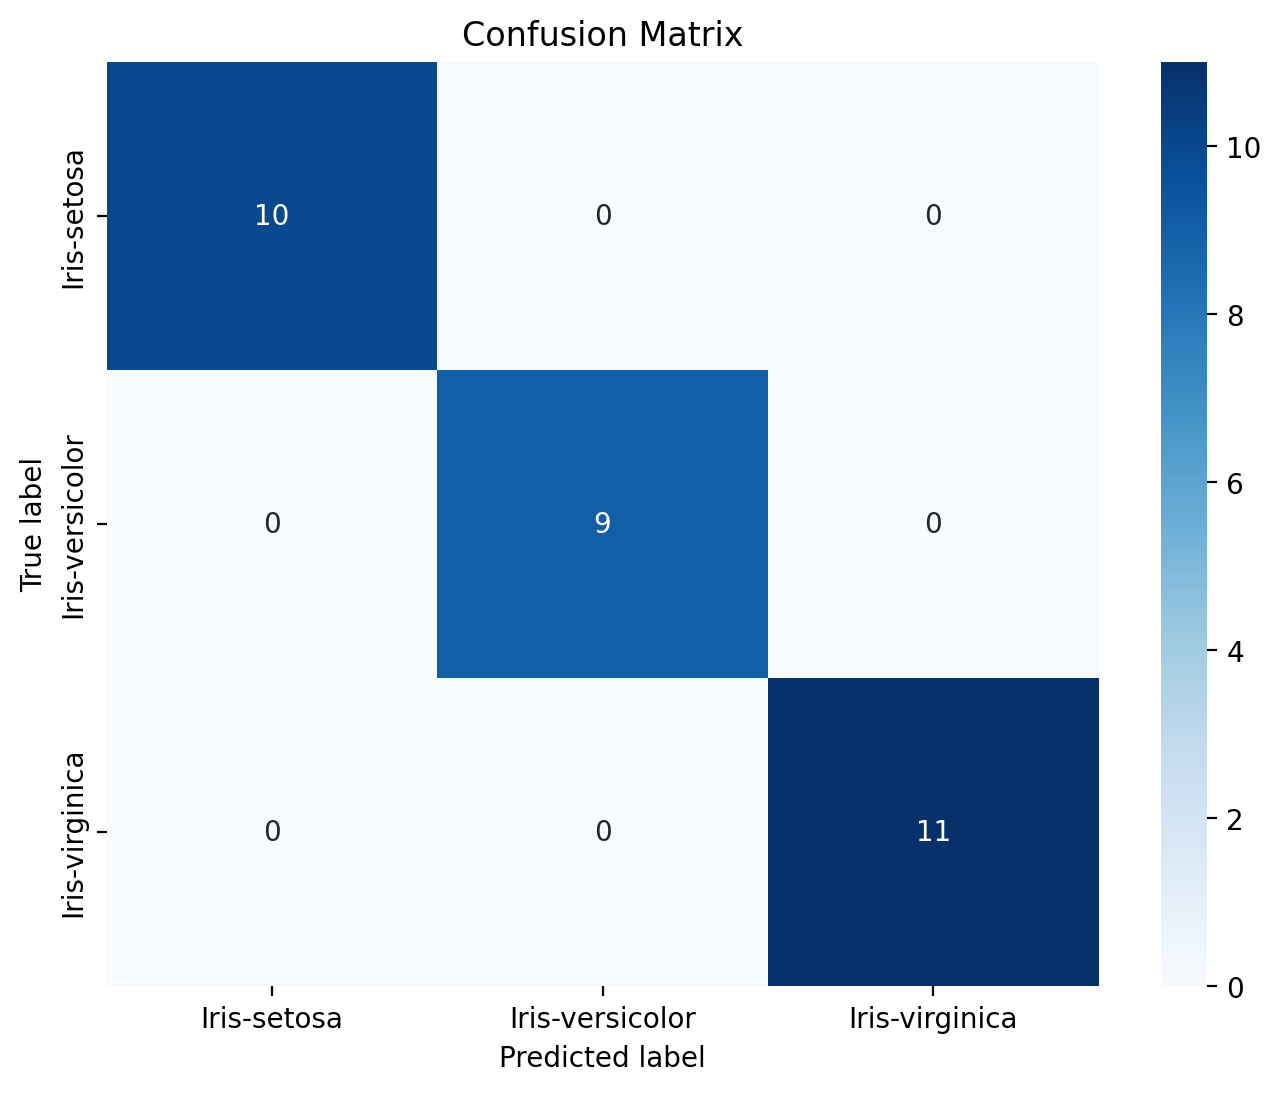

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_knn = grid_search.best_estimator_


Best Hyperparameters: {'n_neighbors': 3}


In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95


# Model Comparison

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
models = {
    'KNN': best_knn,
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print(f"{name} Accuracy:", accuracy)

KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
